In [1]:
greetings = "Ayubowan Sri Lanka"
print(greetings)

Ayubowan Sri Lanka


### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [3]:
df = pd.read_excel("Canada.xlsx",
                   sheet_name = "Canada by Citizenship",
                   skiprows = range(20),
                   skipfooter = 2)
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# Dimensions
df.shape

(195, 43)

In [5]:
df.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

### Data Cleaning

In [6]:
# Drop unnecessary columns
df.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis = 1, inplace = True)
df.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# Rename
df.rename(columns = {"OdName": "Country", "AreaName": "Continent", "RegName": "Region"}, inplace = True)
df.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [9]:
# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index("Country", inplace = True)
df.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


**Add total column**

In [10]:

df["Total"] = df.sum(axis = 1)
df.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

### Pie Chart

In [12]:
df_continents = df.groupby("Continent", axis = 0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


**Immigration to Canada by Continent**

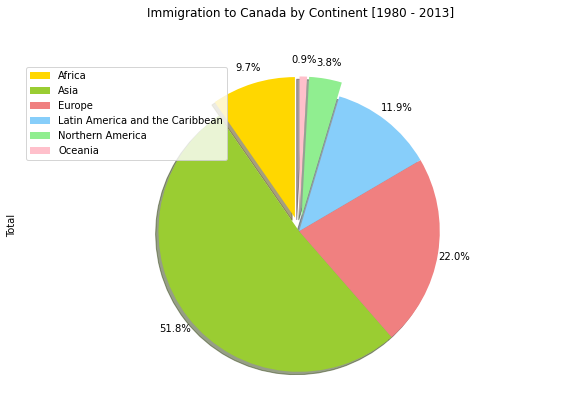

In [13]:
# Pie Plot
colors_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents["Total"].plot(kind = "pie",
                            figsize = (10, 6),
                            autopct = "%1.1f%%",
                            startangle = 90,
                            shadow = True,
                            labels = None,
                            pctdistance = 1.12,
                            colors = colors_list,
                            explode = explode_list)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y = 1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels = df_continents.index, loc = "upper left")
plt.show()

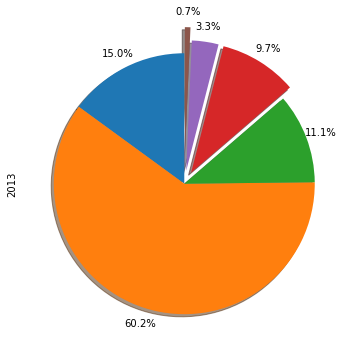

In [14]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['2013'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

### Box Plots

In [15]:
# to get a dataframe, place extra square brackets around 'Japan'
df_japan = df.loc[["Japan"], years].T
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


**Japanese Immigrants to Canada**

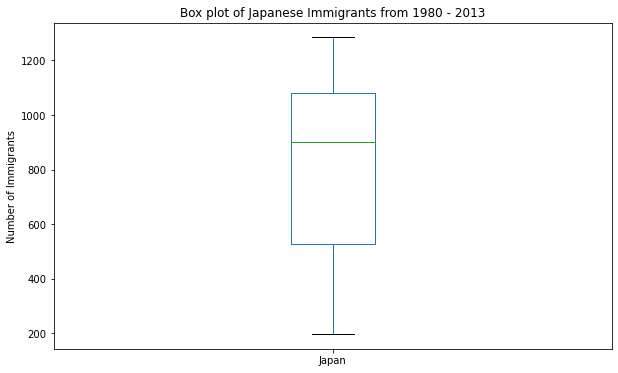

In [16]:
# Plotting
df_japan.plot(kind = "box", figsize = (10, 6))
plt.title("Box plot of Japanese Immigrants from 1980 - 2013")
plt.ylabel('Number of Immigrants')
plt.show()

In [17]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


**Comparison of India and China Immirants to Canada**

In [18]:
df_C1 = df.loc[["China", "India"], years].T
df_C1.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [19]:
df_C1.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


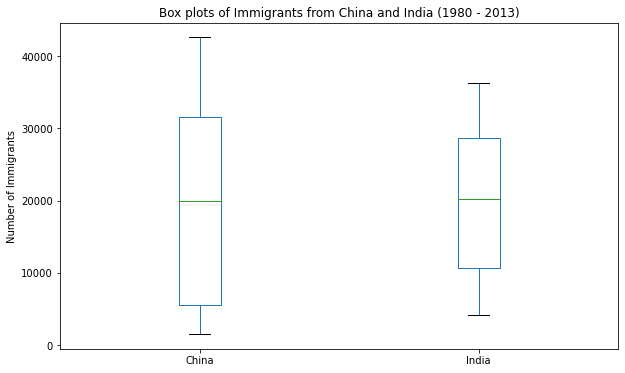

In [20]:
df_C1.plot(kind = "box", figsize = (10, 6))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

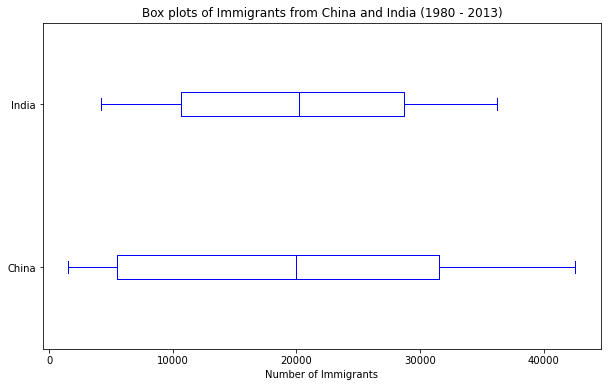

In [21]:
# horizontal box plots
df_C1.plot(kind='box', figsize=(10, 6), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Comparison of Pakistan and India Immigrants to Canada**

### Subplots

In [22]:
df_PI = df.loc[["Pakistan", "India"], years].T
df_PI.head()

Country,Pakistan,India
1980,978,8880
1981,972,8670
1982,1201,8147
1983,900,7338
1984,668,5704


In [23]:
df_PI.describe()

Country,Pakistan,India
count,34.000000,34.000000
mean,7105.882353,20350.117647
std,5315.849587,10007.342579
min,514.000000,4211.000000
25%,1565.750000,10637.750000
50%,7014.000000,20235.000000
75%,12259.000000,28699.500000
max,16708.000000,36210.000000


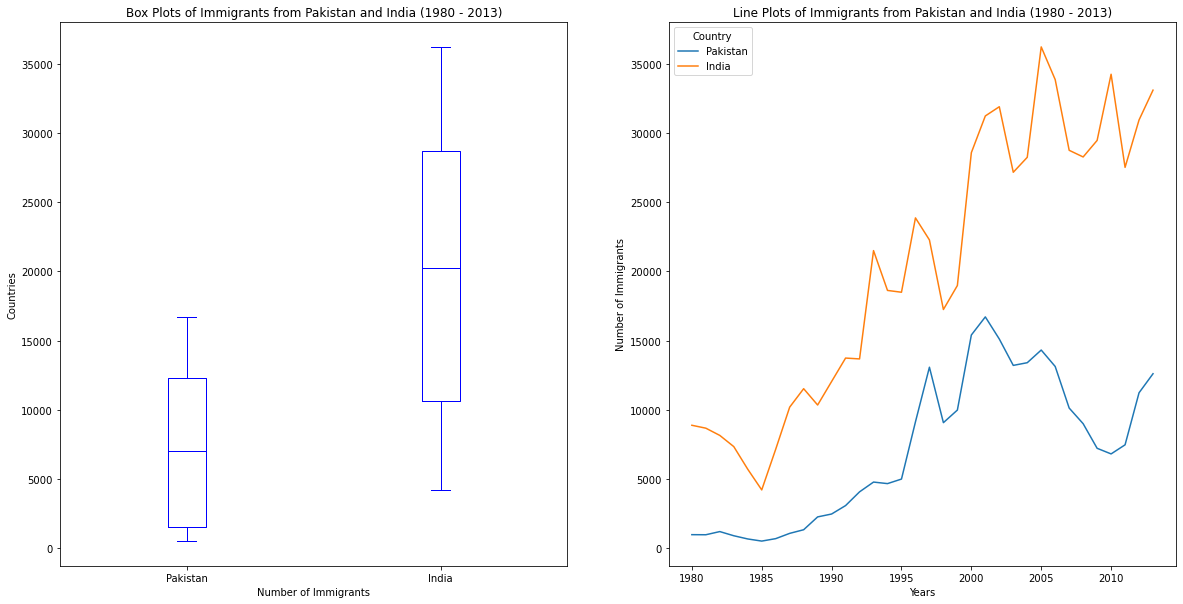

In [24]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box Plot
df_PI.plot(kind = "box", figsize = (20, 10), color = "blue", ax = ax0)
ax0.set_title("Box Plots of Immigrants from Pakistan and India (1980 - 2013)")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

# Subplot 2: Line plot
df_PI.plot(kind = "line", figsize = (20, 10), ax = ax1)
ax1.set_title ('Line Plots of Immigrants from Pakistan and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

**the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s**

In [25]:
df_top15 = df.sort_values(["Total"], ascending = False, axis = 0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [26]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

    # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


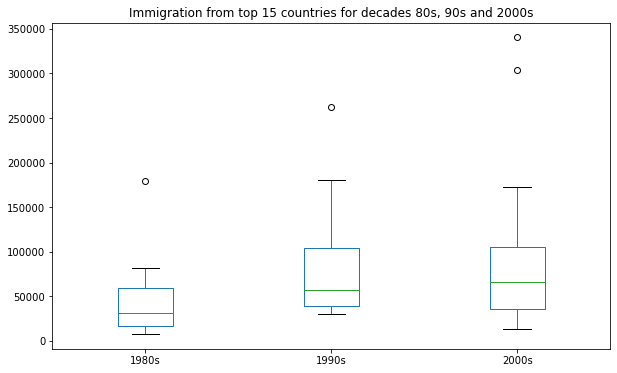

In [27]:
new_df.plot(kind = "box", figsize = (10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [28]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


**the distribution of the top 15 countries (based on total immigration) grouped by 1980s**

In [29]:
new_df1980s = new_df["1980s"].sort_values(ascending = False, axis = 0)
new_df1980s.to_frame().head(15)

,1980s
2,179171
0,82154
5,76824
3,60764
9,57602
12,34328
1,32003
13,30638
10,24918
6,21477


**the distribution of the top 15 countries (based on total immigration) grouped by the decades 1990s**

In [30]:
new_df1990s = new_df["1990s"].sort_values(ascending = False, axis = 0)
new_df1990s.to_frame().head(15)

,1990s
2,261966
0,180395
1,161528
3,138482
7,70421
4,65302
9,64864
5,56915
6,54871
10,49245


**the distribution of the top 15 countries (based on total immigration) grouped by 2000s**

In [31]:
new_df2000s = new_df["2000s"].sort_values(ascending = False, axis = 0)
new_df2000s.to_frame().head(15)

,2000s
1,340385
0,303591
3,172904
4,127598
2,83413
5,75173
8,68183
6,65794
7,49678
14,45515


### Scatter Plots

In [32]:
# we can use the sum() method to get the total population per year
pop_years = pd.DataFrame(df[years].sum(axis = 0))
pop_years.head(5)

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [33]:
# change the years to type int (useful for regression later on)
pop_years.index = map(int, pop_years.index)

In [34]:
# reset the index to put in back in as a column in the df_tot dataframe
pop_years.reset_index(inplace = True)
pop_years.head(5)

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [35]:
# Rename Columns
pop_years.columns = ["year", "total"]
pop_years.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


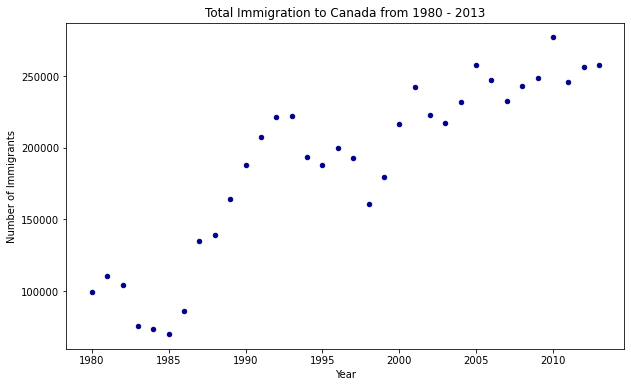

In [36]:
# Scatter Plot
pop_years.plot(kind = "scatter", x = "year", y = "total", figsize = (10, 6), color = "darkblue")
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

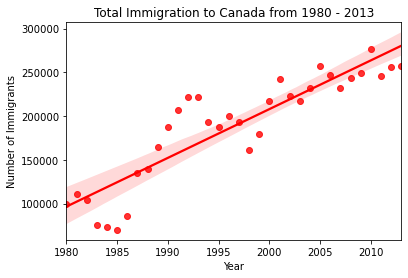

In [37]:
# Regression
sns.regplot(x = "year", y = "total", data = pop_years, color = "red")
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

**scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?**

In [38]:
# Countries DataFrame
df_countries = df.loc[["Denmark", "Norway", "Sweden"], years].T
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [39]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [40]:
# reset index in place
df_total.reset_index(inplace = True)

# Rename Columns
df_total.columns = ["Year", "Total"]

df_total.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [41]:
# change column year from string to int to create scatter plot
df_total["Year"] = df_total["Year"].astype("int")
df_total.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


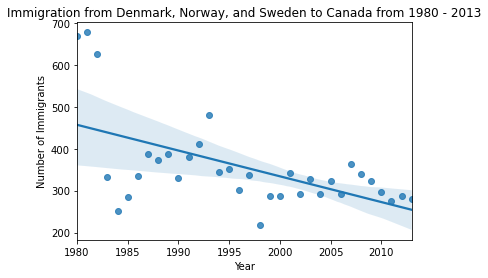

In [42]:
sns.regplot(x = "Year", y = "Total", data = df_total)
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

    # show plot
plt.show()

### Bubble Plots

**bubble plot of the total immigration from Argentina and Brazil to Canada from 1980 to 2013?**

In [43]:
df_T = df[years].T                # Transpose
df_T.index = map(int, df_T.index) # Years(int)
df_T.index.name = "Year"
df_T.reset_index(inplace = True)
df_T.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [46]:
# Normalize Brazil Data
norm_brazil =(df_T["Brazil"] - df_T["Brazil"].min()) / (df_T["Brazil"].max() - df_T["Brazil"].min())

# Normalize Argentina Data
norm_argentina = (df_T["Argentina"] - df_T["Argentina"].min()) / (df_T["Argentina"].max() - df_T["Argentina"].min())

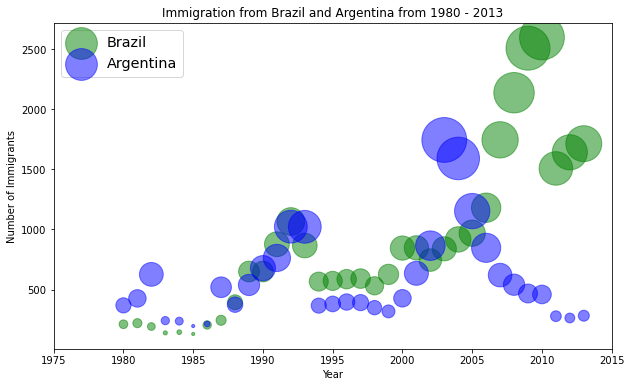

In [49]:
# Brazil
ax0 = df_T.plot(kind = "scatter",
                x = "Year",
                y = "Brazil",
                figsize = (10, 6),
                alpha = 0.5,
                color = "green",
                s = norm_brazil * 2000 + 10,
                xlim = (1975, 2015))

# Argentina
ax1 = df_T.plot(kind = "scatter",
                x = "Year",
                y = "Argentina",
                alpha = 0.5,
                color = "blue",
                s = norm_argentina * 2000 + 10,
                ax = ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**bubble plot of the total immigration from India and China to Canada from 1980 to 2013?**

In [52]:
# Normalize India Data
norm_india = (df_T["India"] - df_T["India"].min()) / (df_T["India"].max() - df_T["India"].min())

# Normalize China Data
norm_china = (df_T["China"] - df_T["China"].min()) / (df_T["China"].max() - df_T["China"].min())

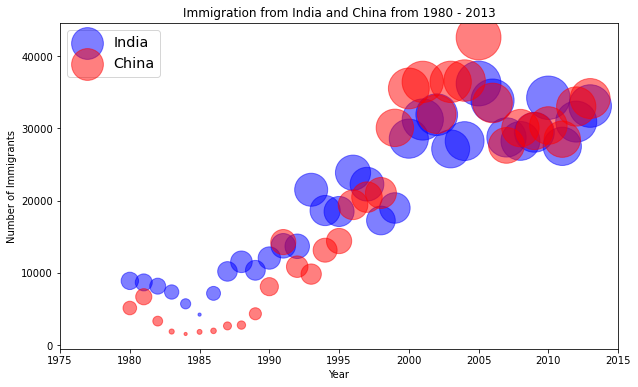

In [55]:
# India
ax0 = df_T.plot(kind = "scatter",
                x = "Year",
                y = "India",
                figsize = (10, 6),
                alpha = 0.5,
                color = "blue",
                s = norm_india * 2000 + 10,
                xlim = (1975, 2015))

# China
ax1 = df_T.plot(kind = "scatter",
                x = "Year",
                y = "China",
                alpha = 0.5,
                color = "red",
                s = norm_china * 2000 + 10,
                ax = ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and China from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')